<a href="https://colab.research.google.com/github/AEYSHA-AZAM/Data-zenix-Project-5./blob/main/Predicting_House_Prices_with_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [30]:
# Set random seed
np.random.seed(2025)

# Number of rows
n = 500

# Generate feature columns
area = np.random.normal(1800, 400, n).clip(500, 4000)  # sqft
bedrooms = np.random.randint(1, 6, n)
bathrooms = np.random.randint(1, 5, n)
year_built = np.random.randint(1970, 2025, n)
garage = np.random.randint(0, 2, n)
location_score = np.random.normal(7, 1.5, n).clip(1, 10)
distance_city_center = np.random.normal(10, 4, n).clip(0.5, 30)

# Generate target column: Price
price = (
    50000 +
    (area * 150) +
    (bedrooms * 10000) +
    (bathrooms * 12000) +
    ((2025 - year_built) * -300) +
    (garage * 15000) +
    (location_score * 10000) -
    (distance_city_center * 1200) +
    np.random.normal(0, 20000, n)
)

# Create DataFrame
df = pd.DataFrame({
    'Area': area.round(),
    'Bedrooms': bedrooms,
    'Bathrooms': bathrooms,
    'YearBuilt': year_built,
    'Garage': garage,
    'LocationScore': location_score.round(2),
    'DistanceToCityCenter': distance_city_center.round(2),
    'Price': price.round(2)
})

# Preview dataset
df.head()


,Area,Bedrooms,Bathrooms,YearBuilt,Garage,LocationScore,DistanceToCityCenter,Price
0,1763.0,1,3,2009,1,8.05,7.47,420618.30
1,2094.0,4,3,1985,1,6.83,8.78,507812.57
2,1224.0,1,1,2023,1,7.49,10.37,311998.96
3,1535.0,2,4,2019,0,5.96,11.64,416503.13
4,1760.0,1,3,1989,1,6.75,12.63,407350.46


In [31]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Dataset info
print("\nData Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Missing values:
 Area                    0
Bedrooms                0
Bathrooms               0
YearBuilt               0
Garage                  0
LocationScore           0
DistanceToCityCenter    0
Price                   0
dtype: int64

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Area                  500 non-null    float64
 1   Bedrooms              500 non-null    int64  
 2   Bathrooms             500 non-null    int64  
 3   YearBuilt             500 non-null    int64  
 4   Garage                500 non-null    int64  
 5   LocationScore         500 non-null    float64
 6   DistanceToCityCenter  500 non-null    float64
 7   Price                 500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB
None

Summary Statistics:
              Area    Bedrooms   Bathrooms    YearBuilt    

In [32]:
# Define input features and target
X = df.drop("Price", axis=1)
y = df["Price"]

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=2025
)


In [33]:
# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [34]:
# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 364883885.5633411
R-squared (R²): 0.9204778041794307


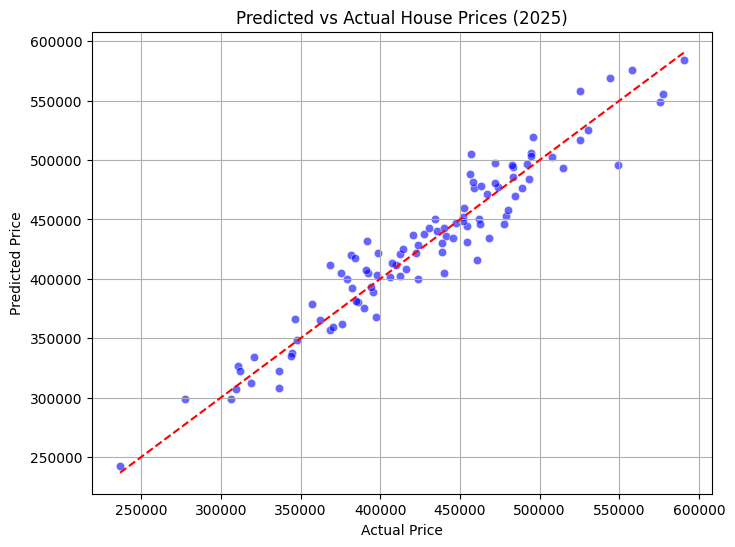

In [35]:
# Plot Actual vs Predicted prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual House Prices (2025)")
plt.grid(True)
plt.show()


In [36]:
# Save the generated dataset
df.to_csv("house_prices_2025.csv", index=False)
print("Dataset saved as house_prices_2025.csv")


Dataset saved as house_prices_2025.csv
